# Recitation 3 - Integration and Visualization

In this notebook, we will be using the BBC GoodFoods dataset which will give us some hands-on practice of data integration and visualization. The dataset is created by Arth Talati by scraping https://www.bbc.co.uk/food.



# Importing Packages

One of the reasons why Python is an extremely useful language is due to the wide array of packages avaliable.

These are some of the packages that we will be using within this notebook:
1. `pandas`: the bread and butter package that you will get to know very well throughout this course
2. `seaborn`: simple, yet aesthetic data visualization
3. `plotly`: interactive data visualization
4. `pickle`: serializing and deserializing python object structures

Other notable packages are `numpy` (array manipulation) , `matplotlib` (data visualization), and `scikit-learn` (machine learning)

# 1. Data Import

In [ ]:
!pip install pandasql
!pip install sqlalchemy==1.4.46

# Basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
import pickle

# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run the following cell to load the dataset

In [ ]:
# Loading the dataset from the google drive
file_path = r"/content/drive/Shareddrives/CIS 5450 2023 Spring/Recitations/Recitation 3 (Integration and Visualization)/bbc_df.data"
with open(file_path, 'rb') as filehandle:
    # read the data as binary data stream
    bbc_df = pickle.load(filehandle)

In [ ]:
file_path = r"/content/bbc_df.data"
with open(file_path, 'rb') as filehandle:
    # read the data as binary data stream
    bbc_df = pickle.load(filehandle)

Let's see what our data looks like

In [ ]:
# Displaying first 5 rows of the dataset
bbc_df.head(5)

,title,url,author,rating,difficulty,serves,prep_time,cook_time,nutrition,id,cusine,post_dates,diet_types,courses,compact_ingredients,rating_of_100,collections,method,ingredients
0,"Tangy carrot, red cabbage & onion salad",https://www.bbcgoodfood.com/recipes/tangy-carr...,Good Food,1.0,Easy,4.0,900.0,NaN,"{'kcal': '146', 'fat': '7g', 'saturates': '1g'...",95429,Asian,1257033600,"[Vegetarian, Low-salt]","[Side dish, Dinner]","[carrot, red cabbage, red onion, mint, coriand...",89.0,"[Vietnamese, Autumn salad, Grated carrot]","Tip the carrots, cabbage and onions into a bow...","[4 carrots, cut into thin sticks or grated Car..."
1,Griddled flatbreads,https://www.bbcgoodfood.com/recipes/griddled-f...,Mary Cadogan,1.0,Moreeffort,NaN,900.0,300.0,"{'kcal': '117', 'fat': '2g', 'saturates': '0g'...",100977,British,1217545200,"[Vegetarian, Low-salt]","[Side dish, Snack]","[wholemeal flour, white flour, yeast, sugar, o...",84.0,"[Turkish, Griddled, Flatbread, Wholemeal bread]",Tip the flours into a food processor. Add the ...,"[250g strong wholemeal flour, 250g strong whit..."
2,Easy hummus recipe,https://www.bbcgoodfood.com/recipes/easy-hummu...,Sarah Cook,1.0,Easy,NaN,300.0,NaN,"{'kcal': '135', 'fat': '5.1g', 'saturates': '0...",101317,Middle Eastern,1325376000,"[Low-salt, Vegetarian]","[Lunch, Side dish]","[chickpea, tahini paste, garlic clove, Greek y...",86.0,"[Lunchbox, Under 200 cal, Vegetarian picnic, S...",Drain the chickpeas into a sieve set over a bo...,"[1 x 400g can chickpea, don't drain, 1 tbsp ta..."
3,Turkish lamb pilau,https://www.bbcgoodfood.com/recipes/turkish-la...,Good Food,1.0,Easy,4.0,NaN,1800.0,"{'kcal': '584', 'fat': '24g', 'saturates': '9g...",97335,Turkish,1114902000,[Low-salt],"[Dinner, Lunch, Main course, Supper]","[pine nut, olive oil, onion, cinnamon, lamb, b...",73.0,"[Turkish, Slow cooker, Tagine, Easter leftover]",Dry-fry the pine nuts or almonds in a large pa...,"[small handful pine nuts or flaked almonds, 1 ..."
4,"Slow-roast lamb with cinnamon, fennel & citrus",https://www.bbcgoodfood.com/recipes/slow-roast...,Sarah Cook,1.0,Easy,6.0,900.0,15600.0,"{'kcal': '514', 'fat': '32g', 'saturates': '13...",101226,Middle Eastern,1296518400,[Low-salt],"[Dinner, Main course]","[lamb, lemon, olive oil, clear honey, cinnamon...",91.0,"[Dinner party main, Mother's Day, Father's Day...",Put the lamb into a large food bag with all th...,[1 leg of lamb Lamb laamA lamb is a sheep that...


# 2. Data Exploration

Before we can implement algorithms or derive useful insights from the data, we need to understand our data. So let us begin our data exploration!

The describe() function will help us to get some important statistics like mean, std, min, max etc. to undertand the distribution of our data.

In [ ]:
#TODO: Get descriptive statistics and distributions for each column
bbc_df.describe()

,rating,serves,prep_time,cook_time,id,post_dates,rating_of_100
count,319.0,253.000000,296.000000,281.00000,3.200000e+02,3.200000e+02,317.000000
mean,1.0,4.229249,1109.797297,2509.75089,1.772962e+06,1.312127e+09,89.145110
std,0.0,1.757866,772.998537,3479.43801,2.936123e+06,1.317322e+08,9.258476
min,1.0,1.000000,300.000000,240.00000,9.333300e+04,1.009843e+09,40.000000
25%,1.0,4.000000,600.000000,720.00000,9.732775e+04,1.225498e+09,84.000000
50%,1.0,4.000000,900.000000,1500.00000,1.005850e+05,1.330560e+09,92.000000
75%,1.0,4.000000,1200.000000,2700.00000,3.597445e+06,1.381900e+09,96.000000
max,1.0,12.000000,5400.000000,25200.00000,1.106932e+07,1.567292e+09,100.000000


We can use dtypes to get the datatype of each column in the dataframe.

In [ ]:
#TODO: Inspect the types of each column in a dataframe
bbc_df.dtypes

title                   object
url                     object
author                  object
rating                 float64
difficulty              object
serves                 float64
prep_time              float64
cook_time              float64
nutrition               object
id                       int64
cusine                  object
post_dates               int64
diet_types              object
courses                 object
compact_ingredients     object
rating_of_100          float64
collections             object
method                  object
ingredients             object
dtype: object

The is.na() function is used to find out if there are null values in the dataset. This will be useful when we deal with real world data and need to handle missing values. The following code will provide the null value distribution across columns

In [ ]:
# TODO: Find the total number of null values in each column
bbc_df.isna().sum()

title                   0
url                     0
author                  1
rating                  1
difficulty              0
serves                 67
prep_time              24
cook_time              39
nutrition               0
id                      0
cusine                 92
post_dates              0
diet_types             85
courses                21
compact_ingredients     3
rating_of_100           3
collections            17
method                  0
ingredients             0
dtype: int64

Now, let's plot some histograms to get a better sense of our data!

Run the following cell to plot a histogram for the column `rating` in the dataset. This will give us a visual representation of the disribution of values in `rating`

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

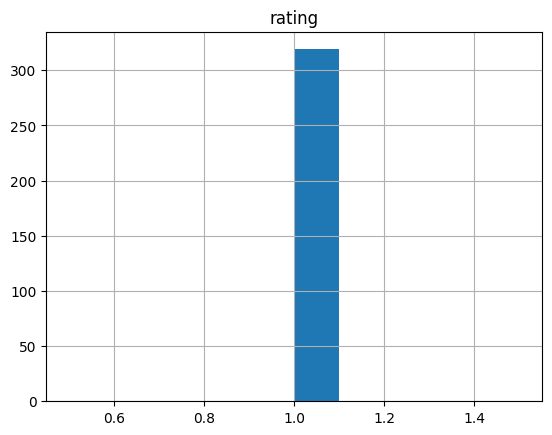

In [ ]:
#TODO: Plotting a histogram using the values of the column `rating`
bbc_df[['rating']].hist()

<ipython-input-29-715f688e1549>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bbc_df[['rating']])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: ylabel='Density'>

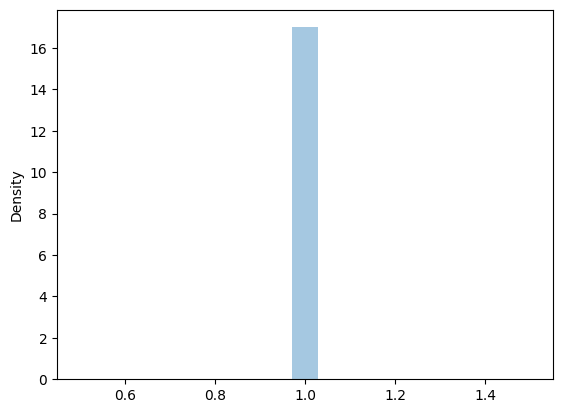

In [ ]:
sns.distplot(bbc_df[['rating']])

array([[<Axes: title={'center': 'serves'}>]], dtype=object)

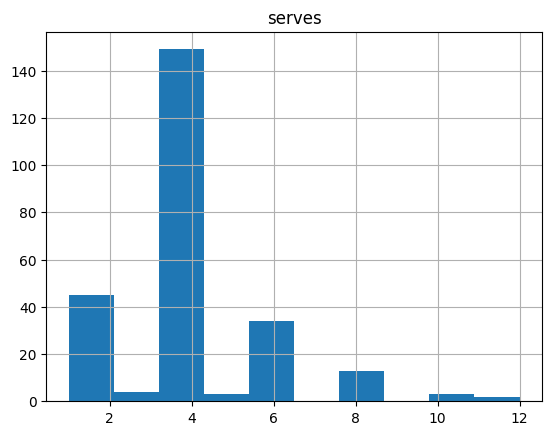

In [ ]:
#TODO: Plot a histogram for the column `serves`
bbc_df[['serves']].hist()

array([[<Axes: title={'center': 'prep_time'}>]], dtype=object)

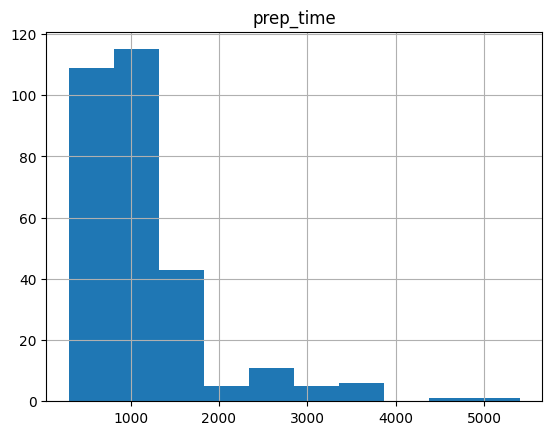

In [ ]:
#TODO: Plot a histogram for the column `prep_time`. Also specify the number of bins as 10
bbc_df[['prep_time']].hist(bins=10)

### Dealing with Lists and List comprehension

Lists are a built-in datatype to store colections of data in Python. While for loops can be used to perform functions on a list, in this section, we will explore list comprehension. This is much faster and more computationally efficient as compared to for loops

IMPORTANT: We highly encourage you to familiarize yourself with list comprehension as it is an essential tool for this course

Let's start with a few examples -

In [ ]:
# List Comprehension Example:

#1D list
[x for x in range(10)]

[x for x in range(10) if x % 2 == 0]


# Using for loops
even_numbers = []
for x in range(10):
    if x % 2 == 0:
        even_numbers.append(x)

even_numbers

[x for x in range(0, 10, 3)]

[0, 3, 6, 9]

In [ ]:
# 2D List
dummy_data = [['a', 'b', 'c'], ['d', 'e'], ['r', 'a'], ['c', 'd']]
# ['a', 'b', 'c', 'd', 'e', 'r', 'a', 'c', 'd']
items = [item for lst in dummy_data for item in lst]
items

# for lst in dummy_data:
#     for item in lst:
#         print(item)

['a', 'b', 'c', 'd', 'e', 'r', 'a', 'c', 'd']

Back to our data! Let's inspect the values we have in our column `diet_types`


In [ ]:
# Looking at the values in the column `diet_types`
bbc_df['diet_types']

0       [Vegetarian, Low-salt]
1       [Vegetarian, Low-salt]
2       [Low-salt, Vegetarian]
3                   [Low-salt]
4                   [Low-salt]
                ...           
315     [Low-salt, Vegetarian]
316        [Healthy, Low-salt]
317                       None
318    [Gluten-free, Low-salt]
319                 [Low-salt]
Name: diet_types, Length: 320, dtype: object

We can see that the data in columns is in the form of lists. Now, let's use list comprehension in our dataset to get a set of unique values from the column `diet_types`

In [ ]:
bbc_df.explode('diet_types')

,title,url,author,rating,difficulty,serves,prep_time,cook_time,nutrition,id,cusine,post_dates,diet_types,courses,compact_ingredients,rating_of_100,collections,method,ingredients
0,"Tangy carrot, red cabbage & onion salad",https://www.bbcgoodfood.com/recipes/tangy-carr...,Good Food,1.0,Easy,4.0,900.0,NaN,"{'kcal': '146', 'fat': '7g', 'saturates': '1g'...",95429,Asian,1257033600,Vegetarian,"[Side dish, Dinner]","[carrot, red cabbage, red onion, mint, coriand...",89.0,"[Vietnamese, Autumn salad, Grated carrot]","Tip the carrots, cabbage and onions into a bow...","[4 carrots, cut into thin sticks or grated Car..."
0,"Tangy carrot, red cabbage & onion salad",https://www.bbcgoodfood.com/recipes/tangy-carr...,Good Food,1.0,Easy,4.0,900.0,NaN,"{'kcal': '146', 'fat': '7g', 'saturates': '1g'...",95429,Asian,1257033600,Low-salt,"[Side dish, Dinner]","[carrot, red cabbage, red onion, mint, coriand...",89.0,"[Vietnamese, Autumn salad, Grated carrot]","Tip the carrots, cabbage and onions into a bow...","[4 carrots, cut into thin sticks or grated Car..."
1,Griddled flatbreads,https://www.bbcgoodfood.com/recipes/griddled-f...,Mary Cadogan,1.0,Moreeffort,NaN,900.0,300.0,"{'kcal': '117', 'fat': '2g', 'saturates': '0g'...",100977,British,1217545200,Vegetarian,"[Side dish, Snack]","[wholemeal flour, white flour, yeast, sugar, o...",84.0,"[Turkish, Griddled, Flatbread, Wholemeal bread]",Tip the flours into a food processor. Add the ...,"[250g strong wholemeal flour, 250g strong whit..."
1,Griddled flatbreads,https://www.bbcgoodfood.com/recipes/griddled-f...,Mary Cadogan,1.0,Moreeffort,NaN,900.0,300.0,"{'kcal': '117', 'fat': '2g', 'saturates': '0g'...",100977,British,1217545200,Low-salt,"[Side dish, Snack]","[wholemeal flour, white flour, yeast, sugar, o...",84.0,"[Turkish, Griddled, Flatbread, Wholemeal bread]",Tip the flours into a food processor. Add the ...,"[250g strong wholemeal flour, 250g strong whit..."
2,Easy hummus recipe,https://www.bbcgoodfood.com/recipes/easy-hummu...,Sarah Cook,1.0,Easy,NaN,300.0,NaN,"{'kcal': '135', 'fat': '5.1g', 'saturates': '0...",101317,Middle Eastern,1325376000,Low-salt,"[Lunch, Side dish]","[chickpea, tahini paste, garlic clove, Greek y...",86.0,"[Lunchbox, Under 200 cal, Vegetarian picnic, S...",Drain the chickpeas into a sieve set over a bo...,"[1 x 400g can chickpea, don't drain, 1 tbsp ta..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Easy chicken tagine,https://www.bbcgoodfood.com/recipes/5967/easy-...,Good Food,1.0,Easy,4.0,600.0,2400.0,"{'kcal': '304', 'fat': '11g', 'saturates': '3g...",97837,Moroccan,1207004400,Low-salt,"[Dinner, Main course, Supper]","[olive oil, skinless boneless chicken thigh, o...",80.0,"[Moroccan, Easy, Healthy one-pot, Tagine, Fami...","Heat the oil in a large, wide pan with a lid, ...",[2 tbsp olive oil Olive oil ol-iv oylProbably ...
317,Speedy Moroccan meatballs,https://www.bbcgoodfood.com/recipes/2998/speed...,Good Food,1.0,Easy,4.0,300.0,900.0,"{'kcal': '388', 'fat': '25g', 'saturates': '9g...",93834,None,1164931200,None,"[Main course, Dinner, Supper, Lunch]","[olive oil, beef, onion, dried apricot, cinnam...",89.0,"[Moroccan, Under 20-minute, Meatball, Canned f...","Heat the oil in a large deep frying pan, then ...",[1 tbsp olive oil Olive oil ol-iv oylProbably ...
318,Moroccan spiced fish with ginger mash,https://www.bbcgoodfood.com/recipes/8088/moroc...,Good Food,1.0,Easy,2.0,600.0,1200.0,"{'kcal': '445', 'fat': '7g', 'saturates': '3g'...",100958,Moroccan,1225497600,Gluten-free,[Dinner],"[sweet potato, butter, garlic clove, harissa, ...",81.0,"[Moroccan, Gluten-free dinner, Sweet potato mash]",Heat oven to 200C/fan 180C/gas 6. Cook the swe...,"[2 large sweet potatoes, peeled and cut into c..."
318,Moroccan spiced fish with ginger mash,https://www.bbcgoodfood.com/recipes/8088/moroc...,Good Food,1.0,Easy,2.0,600.0,1200.0,"{'kcal': '445', 'fat': '7g', 'saturates': '3g'...",100958,Moroccan,1225497600,Low-salt,[Dinner],"[sweet potato, b

In [ ]:
# TODO: Replacing nan with NO_TAG
bbc_df['diet_types'] = bbc_df['diet_types'].fillna('No_tag')
bbc_df['diet_types'].tolist()

In [ ]:
list_of_lists = bbc_df['diet_types'].tolist()

In [ ]:
for i in 'NO_TAG':
    print(i)

N
O
_
T
A
G


In [ ]:
example_series = bbc_df['diet_types']

In [ ]:
[item for lst in example_series for item in lst]

In [ ]:
# TODO: Flatten the list of lists to a single list
list_ = [item for lst in list_of_lists for item in lst]
list_
# TODO: Set function takes the unique elements from the list
set_ = set(list_)
set_

{'Dairy-free',
 'Egg-free',
 'Gluten-free',
 'Healthy',
 'Heart Healthy',
 'Low-calorie',
 'Low-fat',
 'Low-salt',
 'Low-sugar',
 'N',
 'Nut-free',
 'Vegan',
 'Vegetarian',
 '_',
 'a',
 'g',
 'o',
 't'}

In [ ]:
bbc_df['diet_types'].to_list()

# Data Manipulation

In the following section, we will once again review some functions that will be important for Homework 1, specifically:

1. `apply()`
2. `merge()`
3. `group_by()` and `reset_index()`

### 1. Apply

Taking a look at the structure of the nutrition column, we see that it is in the form of key-value pairs

In [ ]:
# TODO: Inspect a sample observation of `nutrition` column
bbc_df['nutrition'][0]

{'kcal': '146',
 'fat': '7g',
 'saturates': '1g',
 'carbs': '17g',
 'sugars': '15g',
 'fibre': '5g',
 'protein': '4g',
 'salt': '0.08g'}

In [ ]:
type(bbc_df['nutrition'][0])

dict

Let's use apply() on our bbc_df to split the nutrition column into individual columns based on keys

Note: apply() takes in an axis parameter which details axis to apply the function on. axis=0 will act on all rows in each column, while axis=1 will act on all columns in each row.

Now, we will convert the `nutrition` column into a dataframe by applying a series function `pd.Series` to the column!

In [ ]:
pd.Series(bbc_df['nutrition'][0])

kcal           146
fat             7g
saturates       1g
carbs          17g
sugars         15g
fibre           5g
protein         4g
salt         0.08g
dtype: object

In [ ]:
# TODO: Make a new df only for data related to nutrition
nutrition_df = bbc_df['nutrition'].apply(pd.Series)
nutrition_df

,kcal,fat,saturates,carbs,sugars,fibre,protein,salt
0,146,7g,1g,17g,15g,5g,4g,0.08g
1,117,2g,0g,22g,1g,2g,4g,0.32g
2,135,5.1g,0.7g,12.4g,1.3g,2.6g,7.5g,0.5g
3,584,24g,9g,65g,0g,3g,32g,1.4g
4,514,32g,13g,8g,5g,0g,50g,0.29g
...,...,...,...,...,...,...,...,...
315,320,18g,3g,37g,0g,2g,5g,0.04g
316,304,11g,3g,14g,12g,3g,39g,0.48g
317,388,25g,9g,24g,17g,6g,18g,1.58g
318,445,7g,3g,65g,17g,0g,36g,0.67g


### Seconds to minutes

In [ ]:
# TODO: Cast the column `prep_time` as float
bbc_df['prep_time']
bbc_df['prep_time_float'] = bbc_df['prep_time'].astype('float64')
bbc_df['prep_time_float']

0       900.0
1       900.0
2       300.0
3         NaN
4       900.0
        ...  
315    1200.0
316     600.0
317     300.0
318     600.0
319     300.0
Name: prep_time_float, Length: 320, dtype: float64

In [ ]:
# TODO: Convert column to timedelta format - >  %H:%M:%S
bbc_df['prep_time_timedelta'] = bbc_df['prep_time_float'].apply(pd.to_timedelta, unit='m')

In [ ]:
pd.to_timedelta(bbc_df['prep_time_float'])

0     0 days 00:00:00.000000900
1     0 days 00:00:00.000000900
2     0 days 00:00:00.000000300
3                           NaT
4     0 days 00:00:00.000000900
                 ...           
315   0 days 00:00:00.000001200
316   0 days 00:00:00.000000600
317   0 days 00:00:00.000000300
318   0 days 00:00:00.000000600
319   0 days 00:00:00.000000300
Name: prep_time_float, Length: 320, dtype: timedelta64[ns]

In [ ]:
# TODO: Check the datatype of columns after conversion
bbc_df['prep_time_timedelta']

0     0 days 15:00:00
1     0 days 15:00:00
2     0 days 05:00:00
3                 NaT
4     0 days 15:00:00
            ...      
315   0 days 20:00:00
316   0 days 10:00:00
317   0 days 05:00:00
318   0 days 10:00:00
319   0 days 05:00:00
Name: prep_time_timedelta, Length: 320, dtype: timedelta64[ns]

In [ ]:
bbc_df.dtypes

title                           object
url                             object
author                          object
rating                         float64
difficulty                      object
serves                         float64
prep_time                      float64
cook_time                      float64
nutrition                       object
id                               int64
cusine                          object
post_dates                       int64
diet_types                      object
courses                         object
compact_ingredients             object
rating_of_100                  float64
collections                     object
method                          object
ingredients                     object
prep_time_float                float64
prep_time_timedelta    timedelta64[ns]
dtype: object

### 2. Merge
Merge is used to join two dataframes with a common id variable. It is also really useful to see intersections between two dataframes - think Venn Diagrams.

What would happen if we had data in separate dataframes?

Let us consider that we have two dataframes which contain the following information:
1. cuisines_df: contains the id, title and cuisine
2. ratings_df: contains the id and ratings

In [ ]:
# TODO: Create cuisines_df which has the columns id, title and cusine
cuisines_df = bbc_df[['id','title','cusine']]
cuisines_df

,id,title,cusine
0,95429,"Tangy carrot, red cabbage & onion salad",Asian
1,100977,Griddled flatbreads,British
2,101317,Easy hummus recipe,Middle Eastern
3,97335,Turkish lamb pilau,Turkish
4,101226,"Slow-roast lamb with cinnamon, fennel & citrus",Middle Eastern
...,...,...,...
315,93859,Tabbouleh salad,Moroccan
316,97837,Easy chicken tagine,Moroccan
317,93834,Speedy Moroccan meatballs,None
318,100958,Moroccan spiced fish with ginger mash,Moroccan


In [ ]:
# TODO: Create ratings_df which has the columns id, rating_of_100
ratings_df = bbc_df[['id','rating_of_100']]
ratings_df

,id,rating_of_100
0,95429,89.0
1,100977,84.0
2,101317,86.0
3,97335,73.0
4,101226,91.0
...,...,...
315,93859,92.0
316,97837,80.0
317,93834,89.0
318,100958,81.0



Which are the top dishes (rating wise) and what are their ratings?

In [ ]:
# TODO: Merge the dataframes cuisines_df and ratings_df to find which dishes have the top ratings
top_cuisines_df = cuisines_df.merge(ratings_df, how='inner', on='id')
top_cuisines_df

,id,title,cusine,rating_of_100
0,95429,"Tangy carrot, red cabbage & onion salad",Asian,89.0
1,100977,Griddled flatbreads,British,84.0
2,101317,Easy hummus recipe,Middle Eastern,86.0
3,97335,Turkish lamb pilau,Turkish,73.0
4,101226,"Slow-roast lamb with cinnamon, fennel & citrus",Middle Eastern,91.0
...,...,...,...,...
315,93859,Tabbouleh salad,Moroccan,92.0
316,97837,Easy chicken tagine,Moroccan,80.0
317,93834,Speedy Moroccan meatballs,None,89.0
318,100958,Moroccan spiced fish with ginger mash,Moroccan,81.0


Try setting how=left and how=right

What do you notice?

In [ ]:
# TODO: Implement the above merge operation by setting how=left (call it left_cuisines_df) and how=right (call it right_cuisines_df)
left_cuisines_df = cuisines_df.merge(ratings_df, how='left', on='id')
right_cuisines_df = cuisines_df.merge(ratings_df, how='right', on='id')

### 3. Aggregation

In order to get a broader picture of our data, we often want to aggregate values with classic summary statistics such as mean, median, and count.
This is especially important when we want to compare different groups within our data.

Now that we have a top_cuisines_df that consists of all recipe titles, cuisines and their respective ratings, an interesting metric to look at would be the rating of each cuisine

In order to do this in pandas, we must first call the groupby() function and specify the group we want to aggregate on (in this case cuisine) and then call the specific summary statistic function.

For example, if we wanted to find the mean of each group we would do the following:

df.group_by(group).mean()

Let's create a new df, agg_cusines_df that will group our top_cuisines_df by the field cuisine and calculate the mean

Notice our use of reset_index()

In [ ]:
#TODO: Get the average ratings of all cuisines
agg_cuisines_df = top_cuisines_df.groupby('cusine').mean().reset_index()
agg_cuisines_df

<ipython-input-96-b5164c09a4c9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_cuisines_df = top_cuisines_df.groupby('cusine').mean().reset_index()


,cusine,id,rating_of_100
0,American,4.989432e+06,91.600000
1,Asian,9.774100e+04,89.400000
2,British,9.833990e+04,90.700000
3,Caribbean,7.132214e+05,90.687500
4,Chinese,8.458383e+05,88.666667
5,English,1.032550e+05,83.000000
6,French,1.116293e+06,90.153846
7,Greek,3.182631e+05,92.875000
8,Indian,1.720846e+06,86.850000
9,Italian,1.863710e+06,89.571429


Now let's try the same question using pandasql

pandasql allows you to query pandas DataFrames using SQL syntax

In [ ]:
!pip install pandasql
!pip install sqlalchemy==1.4.46
import pandasql as ps #SQL on Pandas Dataframe

In [ ]:
cuisines_df

,id,title,cusine
0,95429,"Tangy carrot, red cabbage & onion salad",Asian
1,100977,Griddled flatbreads,British
2,101317,Easy hummus recipe,Middle Eastern
3,97335,Turkish lamb pilau,Turkish
4,101226,"Slow-roast lamb with cinnamon, fennel & citrus",Middle Eastern
...,...,...,...
315,93859,Tabbouleh salad,Moroccan
316,97837,Easy chicken tagine,Moroccan
317,93834,Speedy Moroccan meatballs,None
318,100958,Moroccan spiced fish with ginger mash,Moroccan


In [ ]:
# TODO: Write a SQL query to get the average rating of all cuisines
bbc_rating_df = bbc_df[['id', 'rating_of_100']]
cus_query = """
SELECT c.cusine, AVG(b.rating_of_100) AS rating
FROM cuisines_df c JOIN bbc_rating_df b ON c.id = b.id
GROUP BY c.cusine
"""
rating_df = ps.sqldf(cus_query, locals())
rating_df

,cusine,rating
0,None,89.197802
1,American,91.600000
2,Asian,89.400000
3,British,90.700000
4,Caribbean,90.687500
5,Chinese,88.666667
6,English,83.000000
7,French,90.153846
8,Greek,92.875000
9,Indian,86.850000


# Data Visualization

Now, that we have sufficiently explored our data, let's start creating some visualizations!. We will specifically be using `seaborn` and `plotly`.

- [seaborn](https://seaborn.pydata.org/) creates relatively aesthetic visualizatons with minimal effort. I like using seaborn for simple, yet informative graphs like barplots, boxplots and line charts and. since the syntax is very straightforward and easy to underst
- [plotly](https://plot.ly/python/) is my favorite Python visualization tool as it creates *interactive* visualizations. There are many predefined graph templates avaliable on the website that can be used to create complex visualizations.

Throughout this section, remember the following data visualization steps:

1. Look at your data
2. Identify the message and its components
3. Select your chart
4. Refine

In [ ]:
# Necessary imports
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py
import plotly.graph_objs as go

## Data Visualization with Seaborn
Using seaborn, let’s answer some simple questions:
### 1. What is the most common level of difficulty within our set of recipes?
To answer this question, the most fitting graph would be a countplot. Let’s use `bbc_df`, let’s make a countplot of the column `difficulty`.

<Axes: xlabel='difficulty', ylabel='count'>

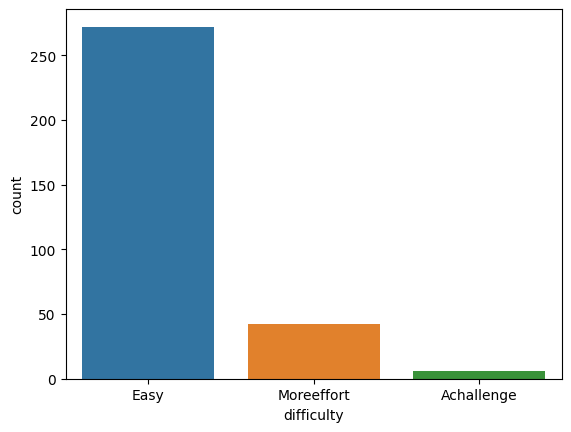

In [ ]:
#TODO: Countplot of the column `difficulty`
sns.countplot(x="difficulty", data=bbc_df)

In [ ]:
bbc_df

,title,url,author,rating,difficulty,serves,prep_time,cook_time,nutrition,id,...,post_dates,diet_types,courses,compact_ingredients,rating_of_100,collections,method,ingredients,prep_time_float,prep_time_timedelta
0,"Tangy carrot, red cabbage & onion salad",https://www.bbcgoodfood.com/recipes/tangy-carr...,Good Food,1.0,Easy,4.0,900.0,NaN,"{'kcal': '146', 'fat': '7g', 'saturates': '1g'...",95429,...,1257033600,"[Vegetarian, Low-salt]","[Side dish, Dinner]","[carrot, red cabbage, red onion, mint, coriand...",89.0,"[Vietnamese, Autumn salad, Grated carrot]","Tip the carrots, cabbage and onions into a bow...","[4 carrots, cut into thin sticks or grated Car...",900.0,0 days 15:00:00
1,Griddled flatbreads,https://www.bbcgoodfood.com/recipes/griddled-f...,Mary Cadogan,1.0,Moreeffort,NaN,900.0,300.0,"{'kcal': '117', 'fat': '2g', 'saturates': '0g'...",100977,...,1217545200,"[Vegetarian, Low-salt]","[Side dish, Snack]","[wholemeal flour, white flour, yeast, sugar, o...",84.0,"[Turkish, Griddled, Flatbread, Wholemeal bread]",Tip the flours into a food processor. Add the ...,"[250g strong wholemeal flour, 250g strong whit...",900.0,0 days 15:00:00
2,Easy hummus recipe,https://www.bbcgoodfood.com/recipes/easy-hummu...,Sarah Cook,1.0,Easy,NaN,300.0,NaN,"{'kcal': '135', 'fat': '5.1g', 'saturates': '0...",101317,...,1325376000,"[Low-salt, Vegetarian]","[Lunch, Side dish]","[chickpea, tahini paste, garlic clove, Greek y...",86.0,"[Lunchbox, Under 200 cal, Vegetarian picnic, S...",Drain the chickpeas into a sieve set over a bo...,"[1 x 400g can chickpea, don't drain, 1 tbsp ta...",300.0,0 days 05:00:00
3,Turkish lamb pilau,https://www.bbcgoodfood.com/recipes/turkish-la...,Good Food,1.0,Easy,4.0,NaN,1800.0,"{'kcal': '584', 'fat': '24g', 'saturates': '9g...",97335,...,1114902000,[Low-salt],"[Dinner, Lunch, Main course, Supper]","[pine nut, olive oil, onion, cinnamon, lamb, b...",73.0,"[Turkish, Slow cooker, Tagine, Easter leftover]",Dry-fry the pine nuts or almonds in a large pa...,"[small handful pine nuts or flaked almonds, 1 ...",NaN,NaT
4,"Slow-roast lamb with cinnamon, fennel & citrus",https://www.bbcgoodfood.com/recipes/slow-roast...,Sarah Cook,1.0,Easy,6.0,900.0,15600.0,"{'kcal': '514', 'fat': '32g', 'saturates': '13...",101226,...,1296518400,[Low-salt],"[Dinner, Main course]","[lamb, lemon, olive oil, clear honey, cinnamon...",91.0,"[Dinner party main, Mother's Day, Father's Day...",Put the lamb into a large food bag with all th...,[1 leg of lamb Lamb laamA lamb is a sheep that...,900.0,0 days 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Tabbouleh salad,https://www.bbcgoodfood.com/recipes/3095/tabbo...,Good Food,1.0,Easy,4.0,1200.0,NaN,"{'kcal': '320', 'fat': '18g', 'saturates': '3g...",93859,...,1091314800,"[Low-salt, Vegetarian]","[Dinner, Lunch, Side dish]","[couscous, tomato, cucumber, spring onion, par...",92.0,"[Moroccan, Summer roast, Tabbouleh, Bulgur whe...",Prepare the couscous: Put the couscous into a ...,[250g couscous Couscous koos-koosConsisting of...,1200.0,0 days 20:00:00
316,Easy chicken tagine,https://www.bbcgoodfood.com/recipes/5967/easy-...,Good Food,1.0,Easy,4.0,600.0,2400.0,"{'kcal': '304', 'fat': '11g', 'saturates': '3g...",97837,...,1207004400,"[Healthy, Low-salt]","[Dinner, Main course, Supper]","[olive oil, skinless boneless chicken thigh, o...",80.0,"[Moroccan, Easy, Healthy one-pot, Tagine, Fami...","Heat the oil in a large, wide pan with a lid, ...",[2 tbsp olive oil Olive oil ol-iv oylProbably ...,600.0,0 days 10:00:00
317,Speedy Moroccan meatballs,https://www.bbcgoodfood.com/recipes/2998/speed...,Good Food,1.0,Easy,4.0,300.0,900.0,"{'kcal': '388', 'fat': '25g', 'saturates': '9g...",93834,...,1164931200,No_tag,"[Main course, Dinner, Supper, Lunch]","[olive oil, beef, onion, dried apricot, cinnam...",89.0,"[Moroccan, Under 20-minute, Meatball, Canned f...","Heat the oil in a large deep frying pan, then ...",[1 tbsp olive oil Olive oil ol-iv oylProbably ...,


### 2. How does `prep_time` vary by difficulty?

Because `prep_time` is a quantitative variable, it will have numeric properties that relate to its distribution (mean, median, spread, etc.) Thus, things like scatter plots, box plots would be great ways to look at the data.

Another effective plot would be a violin plot, which overlays the shape of the overall distribution on top of a standard boxplot.

Using the `bbc_df` dataframe that contains all of our data from the dataset, let's compare difficulty scores:

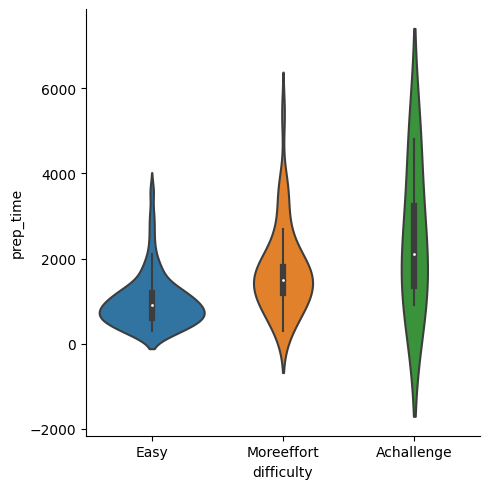

In [ ]:
#TODO: violin plot with prep_time and difficulty
sns.catplot(x="difficulty", y="prep_time", kind="violin", data=bbc_df)

## Data Visualization with Plotly
With plotly, let’s try to create more layered and complex graphs. These can also be created in seaborn, but plotly’s biggest advantages is that you can interact with the graphs in various ways including zooming, isolating variables, and hovering tool tips. This means that you can afford to iniitally create more complicated visuals as you will have the opportunity to interact and adjust the graph later on.


###1. Grouped Bar Plots
One way to “spice” up visualizations is using color to further categorize information. Let’s take advantage of this to compare the different types of genres within our playlists.

In [ ]:
#TODO: Make a plotly bar plot with prep_time and cuisine
fig = px.bar(bbc_df, x='prep_time', y='cusine', color='difficulty')
fig.show()

### 2. 3D Scatter Plots

plotly has a ton of interesting visualization tools, but just because they are interesting, doesn't mean that they are actually meaningful. Would you argue that the 3D scatter plot below is a helpful visual?

In [ ]:
#TODO: Make a plotly 3d plot with cook_time, prep_time and cuisine
px.scatter_3d(bbc_df, x="prep_time", y='cusine', z="cook_time", color='difficulty', template='plotly_dark')

### 3. Side-by-Side Violin Plot

We can manipulate our classic violin plot into a side-by-side violin plot to compare distributions of difficulty across different cuisines. What are the pros of this visualization? Cons?

In [ ]:
#TODO: Make a plotly side by side violin plot with difficulty and cuisine as main variables
fig = go.Figure()
american = bbc_df[bbc_df['cusine'] == 'American']
italian = bbc_df[bbc_df['cusine'] == 'Italian']
fig.add_trace(go.Violin(x=american['difficulty'],
                        y =american['prep_time'], legendgroup ='American', scalegroup='American',
                        name='American', side='negative', line_color='blue'
                        ))
fig.add_trace(go.Violin(x=italian['difficulty'],
                        y =italian['prep_time'], legendgroup ='italian', scalegroup='italian',
                        name='italian', side='negative', line_color='orange'
                        ))
fig.update_traces(meanline_visible=True)
# fig.update_layout(violingap=0, violinmode='overlay')
fig.show()

### 4. Radial Plots

Radial plots, or spider plots is another way to visualize the magnitudes of data. What are the pros of this visualization? Cons?

In [ ]:
#TODO: Make a radial plot using cuisine and difficulty
fig = px.line_polar(bbc_df, r="prep_time", theta="cusine", color="difficulty", line_close=False, color_discrete_sequence=['red', 'orange', 'skyblue'])
fig.show()

##5. Word Clouds

Word Clouds are a great way to view text data. We can use this to visualize the main instructions within the instructions for our recipes.

In [ ]:
from wordcloud import WordCloud

(<Figure size 2000x800 with 1 Axes>, <Axes: >)

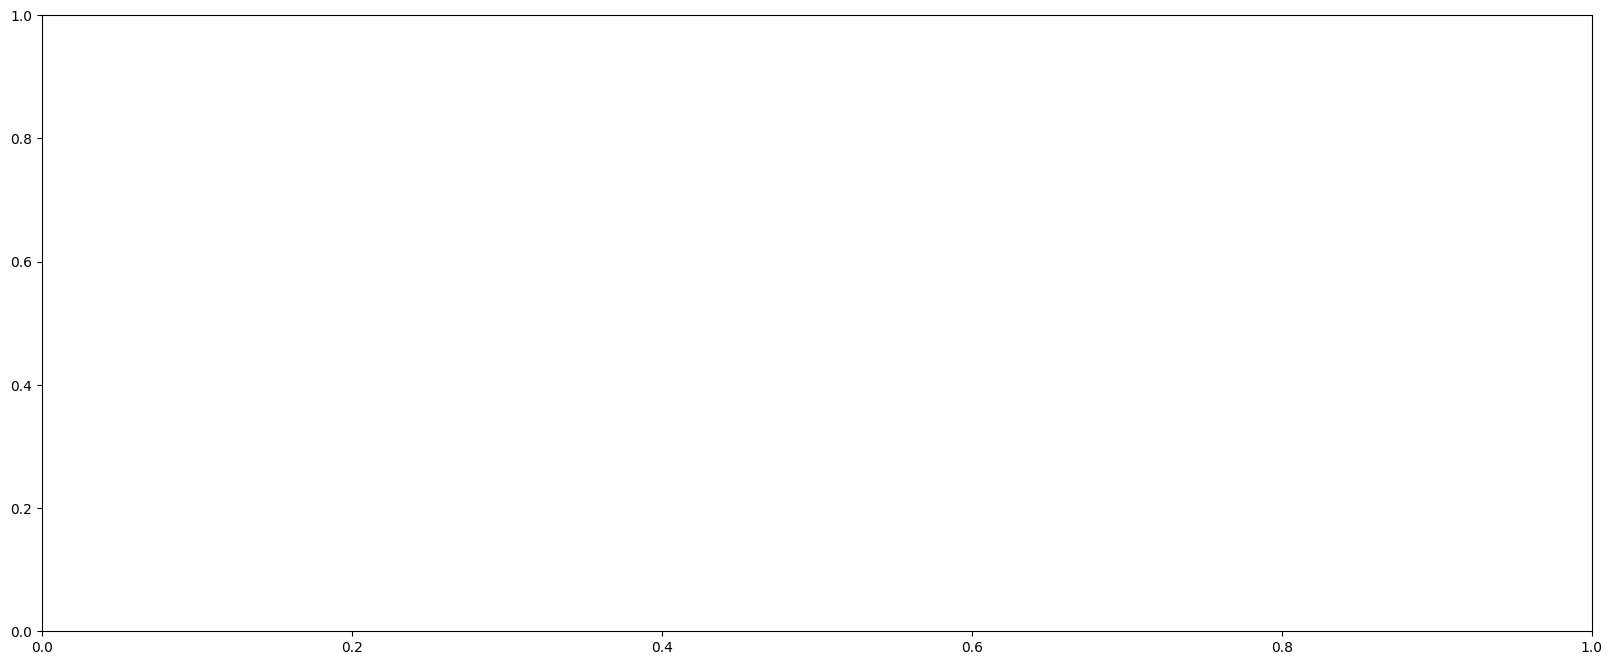

In [ ]:
#TODO: Word Cloud on 'method' of bbc_df
plt.subplots(figsize=(20, 8))

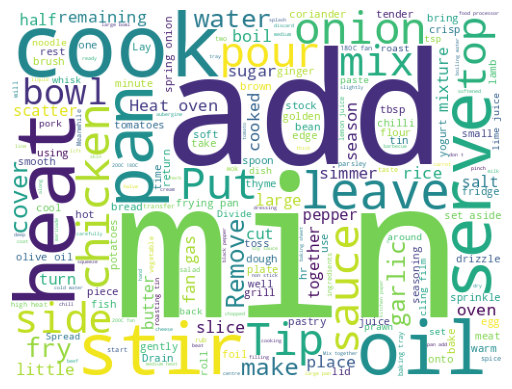

In [ ]:
#TODO: Word Cloud on 'title' of bbc_df

#plt.subplots(figsize = (26, 12))
wordcloud = WordCloud(background_color ='white', width = 512, height = 384).generate(' '.join(bbc_df['method']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

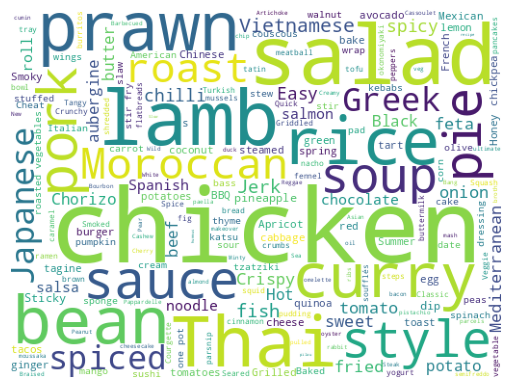

In [ ]:
wordcloud = WordCloud(background_color ='white', width = 512, height = 384).generate(' '.join(bbc_df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Conclusion

Data Wrangling and Visualization are the bread and butter of data analysis. This notebook only covers a small slice of things that can be done in Python, which itself is only one tool among hundreds avaliable for this task.

We hope this notebook was helpful to you, and please reach out to us if you have any questions!

Thanks everyone :)